# Advanced image processes

&copy; 李浩东 3190104890@zju.edu.cn

- Image gradient
- Edge detection
- `Blob` detection algorithm


# Image gradient

![image_gradient](./images/image_gradient.png)


- For an image function $f(x, y)$, its gradient at point $(x, y)$ is a vector

$$
G(f(x, y))=\left[\begin{array}{l}
\displaystyle\frac{\partial f}{\partial x} \\
\displaystyle\frac{\partial f}{\partial y}
\end{array}\right]
$$

- The first-order and second-order differentials of the image are expressed as

$$
\begin{aligned}
&\frac{\partial f}{\partial x}=f(x+1, x)-f(x, y) \\ &\frac{\partial f}{\partial y}=f(x, y+1)-f(x, y) \\
&\frac{\partial^{2} f}{\partial x^{2}}=f(x+1, y)+f(x-1, y)-2 f(x, y) \\&\frac{\partial^{2} f}{\partial y^{2}}=f(x, y+1)+f(x, y-1)-2 f(x, y)
\end{aligned}
$$


### Properties of Image Gradients

- The direction of the gradient is in the direction of the maximum rate of change of the function $f(x, y)$
- The magnitude of the gradient is defined as 

$$G(f(x, y)) =  \displaystyle\left[\left(\frac{\partial f}{\partial x}\right)^{2}+\left(\frac{\partial f}{\partial y}\right)^{2}\right]^{1 / 2}$$

- Horizontal vertical difference method
- Diagonal difference method


##### Horizontal vertical difference method

$$
\begin{gathered}
G[f(x, y)]=\left\{[ f(i, j)-\left.f(i+1, j)\right|^{2}+[f(i, j)-f(i, j+1)]^{2}\right\}^{1 / 2} \\
G[f(x, y)]=|f(i, j)-f(i+1, j)|+|f(i, j)-f(i, j+1)| \quad  \text {(approx) }
\end{gathered}
$$


##### Diagonal difference method

$$
\begin{aligned}
&\left.G[f(x, y)]=\{[ f(i, j)-f(i+1, j+1)]^{2}+[f(i+1, j)-f(i, j+1)]^{2}\right\}^{1 / 2} \\
&G[f(x, y)]=|f(i, j)-f(i+1, j+1)|+|f(i+1, j)-f(i, j+1)|\quad (\text { approx })
\end{aligned}
$$


### Commonly used gradient operators $\left(G=\left(g_{1}^{2}+g_{2}^{2}\right)^{1 / 2}\right)$

- Roberts
- Prewitt
- Sobel
- Krish
- Isotropic Sobel
- Laplacian
- Canny


##### Roberts

- Accurate edge positioning, but sensitive to noise

$$
g_{1}=\left[\begin{array}{cc}
0 * & 1 \\
-1 & 0
\end{array}\right] \quad g_{2}=\left[\begin{array}{cc}
1 * & 0 \\
0 & -1
\end{array}\right]
$$


##### Prewitt

- Averaging, differential, suppressing noise

$$
g_{1}=\left[\begin{array}{ccc}
-1 & 0 & 1 \\
-1 & 0^{*} & 1 \\
-1 & 0 & 1
\end{array}\right] \quad g_{2}=\left[\begin{array}{ccc}
-1 & -1 & 1 \\
0 & 0 * & 0 \\
1 & 1 & 1
\end{array}\right]
$$


##### Sobel

- Weighted average side width, greater than or equal to 2 pixels

$$
g_{1}=\left[\begin{array}{ccc}
-1 & 0 & 1 \\
-2 & 0 * & 2 \\
-1 & 0 & 1
\end{array}\right] \quad g_{2}=\left[\begin{array}{ccc}
-1 & -2 & 1 \\
0 & 0 * & 0 \\
1 & 2 & 1
\end{array}\right]
$$


##### Krish

- Better suppression of noise

$$
g_{1}=\left[\begin{array}{ccc}
5 & 5 & 5 \\
-3 & 0 * & -3 \\
-3 & -3 & -3
\end{array}\right] \quad g_{2}=\left[\begin{array}{ccc}
-3 & -3 & 5 \\
-3 & 0 * & 5 \\
-3 & -3 & 5
\end{array}\right]
$$


##### Isotropic Sobel

- The weight is inversely proportional to the distance between the collar point and the center point, and the gradient magnitude is consistent when detecting edges in different directions

$$
g_{1}=\left[\begin{array}{ccc}
-1 & 0 & 1 \\
-\sqrt{2} & 0 * & \sqrt{2} \\
-1 & 0 & 1
\end{array}\right] \quad g_{2}=\left[\begin{array}{ccc}
-1 & -\sqrt{2} & 1 \\
0 & 0 * & 0 \\
1 & \sqrt{2} & 1
\end{array}\right]
$$


##### Laplacian

- Second-order differential operator, isotropic; sensitive to noise

$$
g_1=\left[\begin{array}{ccc}
0 & -1 & 0 \\
-1 & 4^{*} & -1 \\
0 & -1 & 0
\end{array}\right] \quad g_2=\left[\begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8^{*} & -1 \\
-1 & -1 & -1
\end{array}\right] \\\\ \\\\ g_3=\left[\begin{array}{ccc}
1 & -2 & 1 \\
-2 & 4^{*} & -2 \\
1 & -2 & 1
\end{array}\right] \quad g_4=\left[\begin{array}{ccc}
0 & -1 & 0 \\
-1 & 5 * & -1 \\
0 & -1 & 0
\end{array}\right]
$$


##### Canny

- Gaussian filter for image
- $5\times 5$ Gaussian filter with ${\displaystyle \sigma }  = 1$

$$
\mathbf{B}=\frac{1}{159}\left[\begin{array}{ccccc}
2 & 4 & 5 & 4 & 2 \\
4 & 9 & 12 & 9 & 4 \\
5 & 12 & 15 & 12 & 5 \\
4 & 9 & 12 & 9 & 4 \\
2 & 4 & 5 & 4 & 2
\end{array}\right] * \mathbf{A}
$$


# Edge detection

![edge_detection](./images/edge_detection.png)


### General steps

- ***Filtering***: The edge detection algorithm is mainly based on the first and second derivatives of the image intensity, but the derivatives are sensitive to noise, so filters are needed to improve the performance of noise-related edge detectors
- ***Enhancement***: The basis of enhancing the edge is to determine the change value of the neighborhood intensity of each point in the image. The enhancement algorithm can highlight the points with significant changes in the neighborhood intensity value of the gray point.
- ***Detection***: There are many points in the neighborhood with large gradient values, but in a specific application, these points are not the edge points to be found, and a trade-off is required


(399, 599, 3)


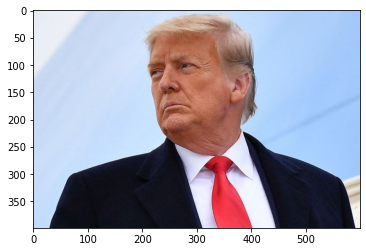

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as mat_color

img_bgr = cv2.imread("./images/trump.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)
plt.imshow(img_rgb, norm=no_norm)
img_gray = cv2.imread("./images/trump.jpg", flags=0)
titles = ["Original"]
images = [img_rgb]

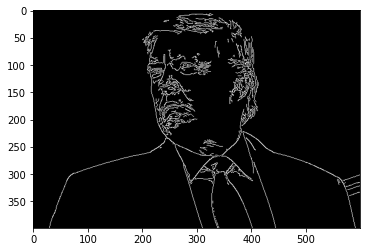

In [2]:
img_edge = cv2.Canny(img_gray, threshold1=70, threshold2=140,
                     apertureSize=3, L2gradient=False)
plt.imshow(img_edge, "gray", norm=no_norm)
titles.append("Gaussian")
images.append(img_edge)

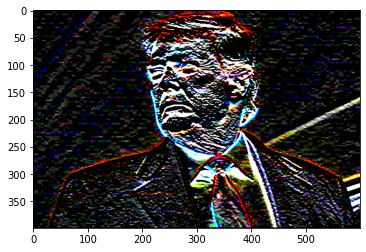

In [3]:
img_edge = cv2.Sobel(img_rgb, cv2.CV_16S, 0, 1, ksize=5, scale=1, delta=0)
plt.imshow(np.clip(img_edge, 0, 255, dtype=np.int32), "gray", norm=no_norm)
titles.append("Sobel X")
images.append(np.clip(img_edge, 0, 255, dtype=np.int32))

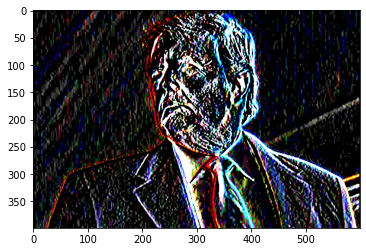

In [4]:
img_edge = cv2.Sobel(img_rgb, cv2.CV_16S, 1, 0, ksize=5, scale=1, delta=0)
plt.imshow(np.clip(img_edge, 0, 255, dtype=np.int32), "gray", norm=no_norm)
titles.append("Sobel Y")
images.append(np.clip(img_edge, 0, 255, dtype=np.int32))

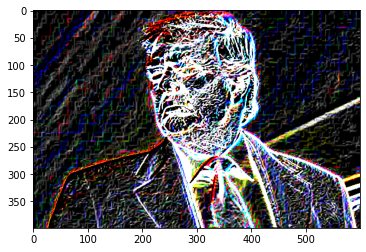

In [5]:
img_edge = cv2.bitwise_or(images[-1], images[-2])
plt.imshow(np.clip(img_edge, 0, 255, dtype=np.int32), "gray", norm=no_norm)
titles.append("Sobel OR")
images.append(np.clip(img_edge, 0, 255, dtype=np.int32))

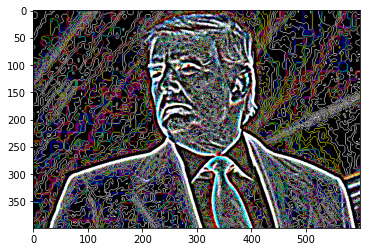

In [6]:
blur = cv2.GaussianBlur(img_rgb, (11, 11), 0)
img_edge = cv2.Laplacian(blur, cv2.CV_64F)
plt.imshow(np.clip(img_edge, 0, 1), "gray", norm=no_norm)
titles.append("Laplacian")
images.append(np.clip(img_edge, 0, 1))

In [7]:
def show_edges(images, titles):
    plt.figure(figsize=(20, 9))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], "gray", norm=no_norm)
        plt.title(titles[i])

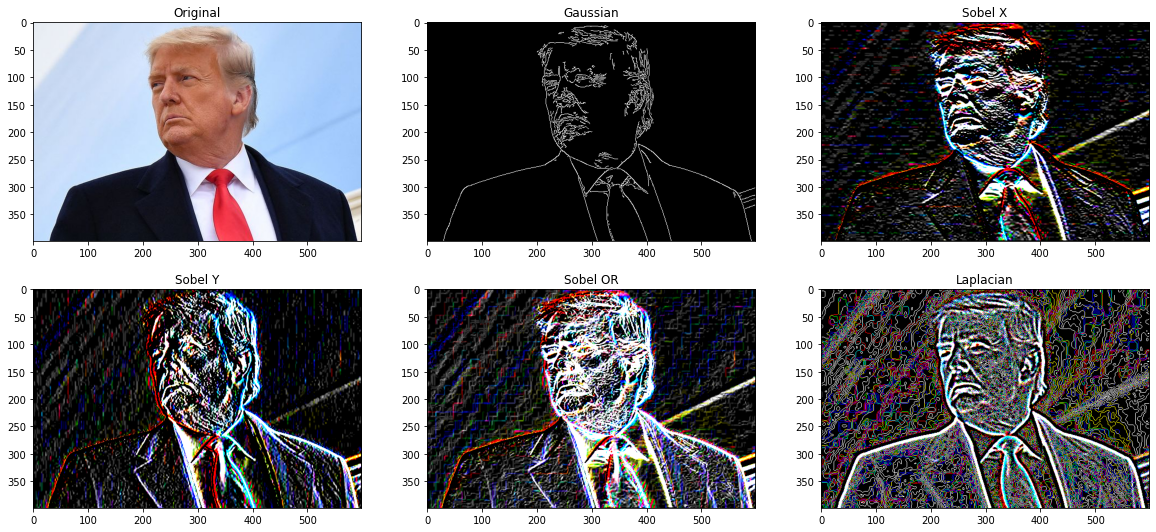

In [8]:
show_edges(images, titles)

# Blob detection

![blob_detection](./images/blob_detection.png)


- `Blob` refers to a connected area in an image with similar color, texture and other features
- The `Blob` detection process is actually the process of binarizing the image, segmenting the foreground and background, and then performing connected area detection to obtain the `Blob` block
- In simple terms, `Blob` detection is to find small areas with "mutations" in a "smooth" area

(694, 1024, 3)


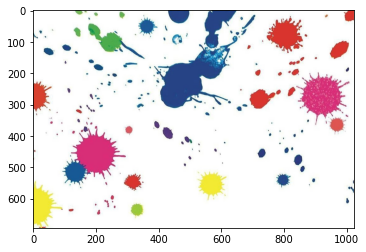

In [9]:
img_bgr = cv2.imread("./images/paint.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)
print(img_rgb.shape)
plt.imshow(img_rgb, norm=no_norm)
img_gray = cv2.imread("./images/paint.jpg", flags=0)

In [10]:
def blob_detector():
    params = cv2.SimpleBlobDetector_Params()
    # change thresholds
    params.minThreshold = 10
    params.maxThreshold = 200
    # filter by area
    params.filterByArea = True
    params.minArea = 1
    # filter by circularity
    params.filterByCircularity = True
    params.minCircularity = 0.5
    # filter by convexity
    params.filterByConvexity = True
    params.minConvexity = 0.5
    # filter by inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.5
    detector = cv2.SimpleBlobDetector_create(params)
    return detector 

detector = blob_detector()
keypoints = detector.detect(img_gray)
print("numbber of Bolds ->", len(keypoints))

numbber of Bolds -> 829


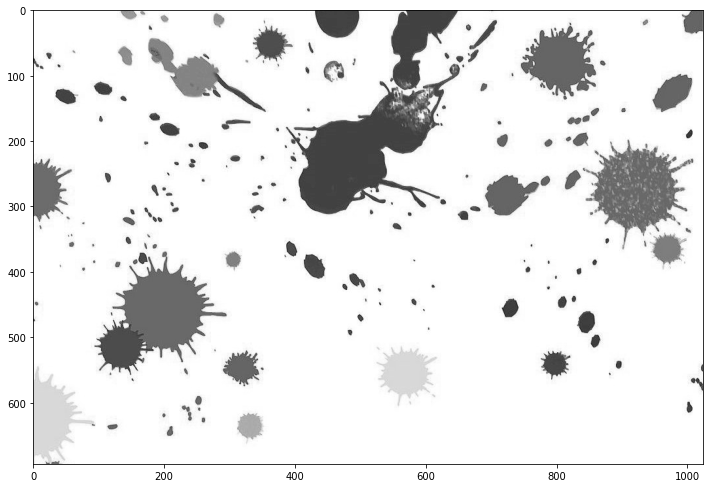

In [11]:
plt.figure(figsize=(12, 12))
plt.imshow(img_gray, "gray", norm=no_norm)

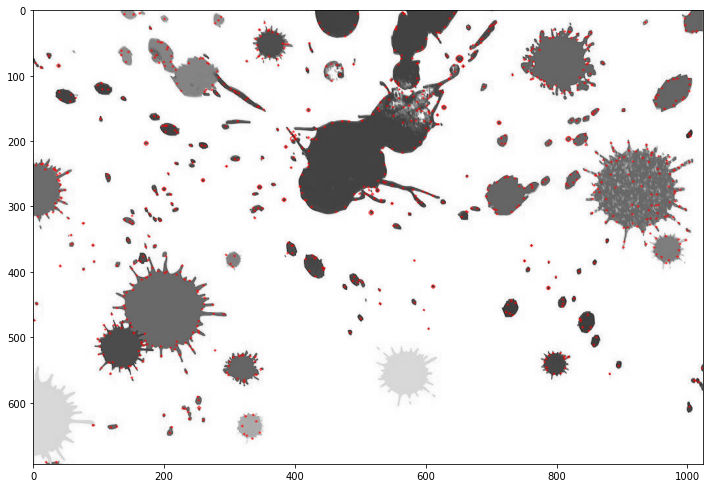

In [12]:
img_pts = cv2.drawKeypoints(img_gray, keypoints, np.array([]), (255, 0, 0), 
                            cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(12, 12))
plt.imshow(img_pts, norm=no_norm)

# The End

2022.3